<a href="https://colab.research.google.com/github/otavioaugusto1/Introduction-to-classification-with-Sklearn/blob/master/Introdu%C3%A7%C3%A3o_a_classifica%C3%A7%C3%A3o_com_SKlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1: classificação de um animal
(classificação entre porco ou cachorro) 0 ou 1.
## Aprendizado supervisionado (previsão com algoritmos de classificação).

## características a serem estudadas: pelo longo;perna curta e faz 'au au'.

In [ ]:
# pelo longo?
#perna longa?
# faz auau?
porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]
cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3= [1,1,1]
# 1 => porco ; 0 => cachorro 
treino_x = [porco1,porco2,porco3,cachorro1,cachorro2,cachorro3]
treino_y = [1,1,1,0,0,0] # labels


In [ ]:
from sklearn.svm import LinearSVC
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
#no aprendizados supervisionado, tive q passar as classes

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
animal_misterioso = [1,1,1]
modelo.predict([animal_misterioso])

array([0])

In [ ]:
misterio1 =[1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]
teste_x =[misterio1,misterio2,misterio3]
modelo.predict(teste_x)
teste_y = [0,1,1]
previsoes = modelo.predict(teste_x)


## Taxa de acerto


In [ ]:
# "accuracy"
from sklearn.metrics import accuracy_score
taxa_de_acerto = accuracy_score(teste_y,previsoes)
print("Taxa de acerto: %.2f " % (taxa_de_acerto * 100))

Taxa de acerto: 66.67 


# Projeto 2

In [ ]:
import pandas as pd

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv")
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [ ]:
mapa={
    "home":"principal",
     "how_it_works" : "como_funciona",
    "contact": "contato",
     "bought": "comprou" 
}
dados = dados.rename(columns = mapa)

In [ ]:
x = dados[["principal","como_funciona","contato"]]
y = dados["comprou"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [ ]:
dados.shape

(99, 4)

In [ ]:
treino_x = x[:75]
teste_x = x[75:]
treino_y = y[:75]
teste_y = y[75:]
print(len(treino_y),len(teste_y))

75 24


In [ ]:
from sklearn.svm import LinearSVC
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
previsoes= modelo.predict(teste_x)
taxa_de_acerto=accuracy_score(teste_y,previsoes)
print(" A acurácia foi %.2f" % (taxa_de_acerto * 100))

 A acurácia foi 95.83


## podia ter feito de outra maneira, há maneiras de separar o treino e teste mais prática

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 20
treino_x,teste_x,treino_y,teste_y=train_test_split(x,y,random_state= SEED,test_size= 0.25)

In [ ]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes =  modelo.predict(teste_x)
acuracia = accuracy_score(teste_y,previsoes) * 100
print("A acurácia foi %.2f" % acuracia)

A acurácia foi 96.00


In [ ]:
treino_y.value_counts()

0    47
1    27
Name: comprou, dtype: int64

# Projeto 3: saber se o projeto será finalizado ou não sabendo as horas previstas e o valor que poderá ser pago. 

In [ ]:
url = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
web = pd.read_csv(url)
web.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
mapa = {
    "unfinished": "nao_finalizado",
    "expected_hours": "horas_previstas",
    "price":"preco"
}
web= web.rename(columns=mapa)
web.head()

,nao_finalizado,horas_previstas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
trocar = {
    0:1,
    1:0
}
web['finalizado']= web['nao_finalizado'].map(trocar)
web.head()


,nao_finalizado,horas_previstas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [ ]:
import seaborn as sns

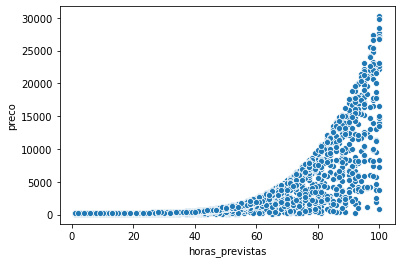

In [ ]:
sns.scatterplot(x='horas_previstas',y='preco',data=web)

In [ ]:
web.corr()

,nao_finalizado,horas_previstas,preco,finalizado
nao_finalizado,1.000000,-0.010927,-0.184062,-1.000000
horas_previstas,-0.010927,1.000000,0.698111,0.010927
preco,-0.184062,0.698111,1.000000,0.184062
finalizado,-1.000000,0.010927,0.184062,1.000000


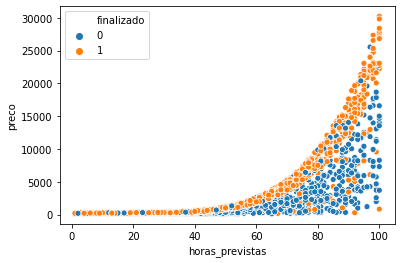

In [ ]:
sns.scatterplot(x='horas_previstas',y='preco',data=web,hue='finalizado')

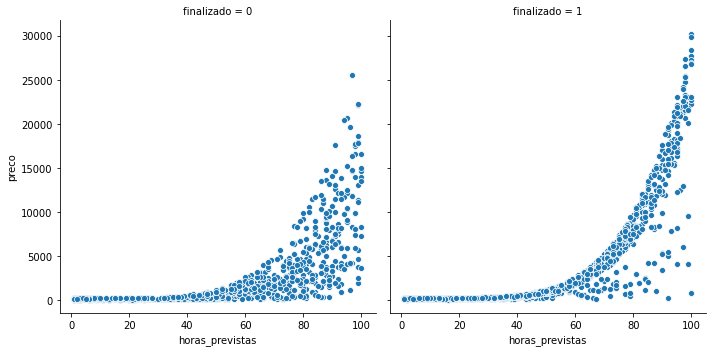

In [ ]:
sns.relplot(x='horas_previstas',y='preco',data=web,col='finalizado')

In [ ]:
x = web[["horas_previstas","preco"]]
y=web['finalizado']

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 20
treino_x,teste_x,treino_y,teste_y=train_test_split(x,y,random_state= SEED,test_size= 0.25)
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes =  modelo.predict(teste_x)
acuracia = accuracy_score(teste_y,previsoes) * 100
print("A acurácia foi %.2f" % acuracia)


A acurácia foi 52.04


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Baseline

In [ ]:
import numpy as np

In [ ]:
baseline=np.ones(540)
acuracia = accuracy_score(teste_y,baseline) * 100
print("A acurácia foi %.2f" % acuracia)

A acurácia foi 52.04


In [ ]:
x_min = teste_x.horas_previstas.min()
x_max = teste_x.horas_previstas.max()
y_min = teste_x.horas_previstas.min()
y_max = teste_x.horas_previstas.max()
pixels = 100
eixo_x=np.arange(x_min,x_max,(x_max-x_min)/pixels)
eixo_y=np.arange(y_min,y_max,(y_max-y_min)/pixels)

In [ ]:
xx,yy = np.meshgrid(eixo_x,eixo_y)
pontos=np.c_[xx.ravel(),yy.ravel()]
pontos

array([[ 1.  ,  1.  ],
       [ 1.99,  1.  ],
       [ 2.98,  1.  ],
       ...,
       [97.03, 99.01],
       [98.02, 99.01],
       [99.01, 99.01]])

In [ ]:
Z=modelo.predict(pontos)
Z=Z.reshape(xx.shape)

In [ ]:
import matplotlib.pyplot as plt

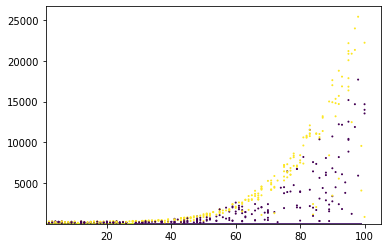

In [ ]:
plt.contourf(xx,yy,Z,alpha=0.9)
plt.scatter(teste_x.horas_previstas,teste_x.preco,c=teste_y,s=1)

# Estimadores não lineares e support vector machine

# Venda de carros fictícias 

In [ ]:
uri ="https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"

In [ ]:
dados = pd.read_csv(uri)
dados.head(10)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
5,5,14661,2007,55405.26,yes
6,6,9990,2002,93415.61,yes
7,7,11599,2008,65265.09,no
8,8,7834,1999,43917.53,yes
9,9,14913,2003,107860.41,yes


In [ ]:
mapa ={
   "mileage_per_year": "milhas_por_ano",
   "model_year":"ano_do_modelo",
   "price":"preco",
   "sold":"vendido"
}

In [ ]:
dados=dados.rename(columns=mapa)

In [ ]:
trocar={
    'no':0,
    'yes':1
}


In [ ]:
dados.vendido=dados.vendido.map(trocar)


In [ ]:
dados.head(10)

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1
5,5,14661,2007,55405.26,1
6,6,9990,2002,93415.61,1
7,7,11599,2008,65265.09,0
8,8,7834,1999,43917.53,1
9,9,14913,2003,107860.41,1


In [ ]:
from datetime import datetime
ano_atual=datetime.today().year
dados['idade_do_modelo']= ano_atual - dados.ano_do_modelo
dados.head(10)

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6
5,5,14661,2007,55405.26,1,13
6,6,9990,2002,93415.61,1,18
7,7,11599,2008,65265.09,0,12
8,8,7834,1999,43917.53,1,21
9,9,14913,2003,107860.41,1,17


In [ ]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head(10)

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290
5,5,14661,2007,55405.26,1,13,23594.53374
6,6,9990,2002,93415.61,1,18,16077.30660
7,7,11599,2008,65265.09,0,12,18666.73466
8,8,7834,1999,43917.53,1,21,12607.56956
9,9,14913,2003,107860.41,1,17,24000.08742


In [ ]:
dados = dados.drop(columns=['Unnamed: 0',"milhas_por_ano","ano_do_modelo"],axis = 1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [ ]:
x = dados[["preco","idade_do_modelo","km_por_ano"]]
y = dados['vendido']
SEED = 20
np.random.seed(SEED)
treino_x,teste_x,treino_y,teste_y=train_test_split(x,y,random_state= SEED,test_size= 0.25,stratify=y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes =  modelo.predict(teste_x)
acuracia = accuracy_score(teste_y,previsoes) * 100
print("A acurácia foi %.2f" % acuracia)


A acurácia foi 58.32


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy = LinearSVC()
dummy.fit(treino_x, treino_y)
acuracia= dummy.score(teste_x,teste_y) * 100
print("A acurácia foi %.2f" % acuracia)


A acurácia foi 58.00


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Árvore de decisão 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
SEED = 5
np.random.seed(SEED)
raw_treino_x,raw_teste_x,treino_y,teste_y = train_test_split(x,y,test_size = 0.25,stratify = y)
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x,treino_y)
previsoes = modelo.predict(raw_teste_x)
acuracia = accuracy_score(teste_y,previsoes)*100
print("A acurácia foi %.2f" % acuracia)


A acurácia foi 79.28


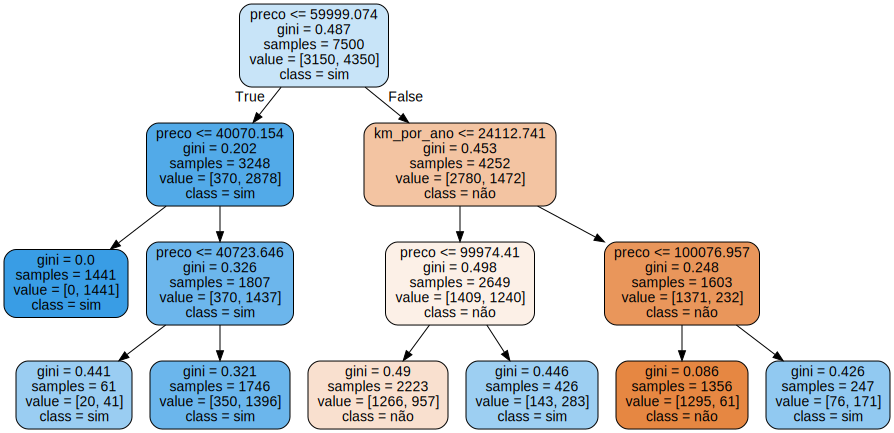

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
features = x.columns 
dot_data=export_graphviz(modelo,out_file= None,feature_names=features,filled= True, rounded=True,class_names=["não","sim"])
grafico = graphviz.Source(dot_data)
grafico